# Import libraries

In [1]:
# import libraries
import numpy as np
import sys
import os

from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
hfont = {'family':'sans-serif','fontname':'Helvetica', 'size':20}
mpl.rc('font',family='sans-serif', size=16)

# Choose parameters

In [2]:
# size ratio
q = 0.4

# build sets of parameters for G3 symmetry functions in the pool of candidates
rc_set = np.array([1.+q])
l_set = np.array([1.0,-1.0])
eta_set = np.array([0.001, 0.01, 0.1, 1, 2, 4, 8])
eps_set = np.array([1, 2, 4, 8])

# build complete list of parameters
rc_list = [rc for rc in rc_set for l in l_set for eta in eta_set for eps in eps_set]
l_list = [l for rc in rc_set for l in l_set for eta in eta_set for eps in eps_set]
eta_list = [eta for rc in rc_set for l in l_set for eta in eta_set for eps in eps_set]
eps_list = [eps for rc in rc_set for l in l_set for eta in eta_set for eps in eps_set]
npool = len(rc_list)

print('Size ratio q:   ' + str(q))
print('Pool dimension: ' + str(npool))  

Size ratio q:   0.4
Pool dimension: 56


# Load pool of candidates

In [3]:
# load pool of candidates
folder = './Dataset_q%.2f' % (q)
path = folder + '/pool.npy'
pool = np.load(path)/108.0
path = folder + '/target.npy'
E = np.load(path)/108.0
print('Pool of candidates shape: ' + str(pool.shape))

Pool of candidates shape: (49500, 56)


# Select SFs from the pool

In [4]:
def select(pool, target, Nmax=None):
    Npool = pool.shape[1]
    Ndata = pool.shape[0]
    if not Nmax or Nmax>Npool:
        Nmax = Npool
        
    std_target = np.std(target, dtype=np.float64, ddof=1)
    r2 = np.zeros(Nmax)
    rmse = np.zeros(Nmax)
    selected_idx = np.zeros(Nmax, dtype=int)
    selected = np.zeros(Npool, dtype=int)
    
    n = 0
    while(n < Nmax):
        X = np.zeros((Ndata,n+1))
        for k in range(n):
            X[:,k] = pool[:,selected_idx[k]]
        maximum = 0.0
        for i in range(Npool):
            if selected[i] == 0:
                X[:,n] = pool[:,i]
                reg = LinearRegression(fit_intercept=False).fit(X, target)
                corr2 = reg.score(X, target)
                if corr2 > maximum:
                    maximum = corr2
                    selected_idx[n] = i
        r2[n] = maximum
        rmse[n] = np.sqrt(1.-r2[n])*std_target
        selected[selected_idx[n]] = 1
        print("Ns = %3d,\tSelected index = %3d\tR2 = %.8f\tRMSE = %.8f" % (n+1, selected_idx[n], r2[n], rmse[n]))
        n += 1
        
    return selected_idx, r2, rmse
        
    
    
# select SFs    
selected_idx, r2, rmse = select(pool, E)

Ns =   1,	Selected index =  39	R2 = 0.99716130	RMSE = 0.00195623
Ns =   2,	Selected index =  55	R2 = 0.99732226	RMSE = 0.00189995
Ns =   3,	Selected index =  34	R2 = 0.99971272	RMSE = 0.00062232
Ns =   4,	Selected index =  38	R2 = 0.99999660	RMSE = 0.00006775
Ns =   5,	Selected index =  51	R2 = 0.99999668	RMSE = 0.00006693
Ns =   6,	Selected index =  54	R2 = 0.99999664	RMSE = 0.00006727
Ns =   7,	Selected index =  30	R2 = 0.99999712	RMSE = 0.00006236
Ns =   8,	Selected index =  42	R2 = 0.99999846	RMSE = 0.00004556
Ns =   9,	Selected index =  15	R2 = 0.99999880	RMSE = 0.00004020
Ns =  10,	Selected index =  23	R2 = 0.99999907	RMSE = 0.00003541
Ns =  11,	Selected index =  46	R2 = 0.99999912	RMSE = 0.00003440
Ns =  12,	Selected index =  31	R2 = 0.99999921	RMSE = 0.00003261
Ns =  13,	Selected index =  11	R2 = 0.99999925	RMSE = 0.00003182
Ns =  14,	Selected index =  13	R2 = 0.99999926	RMSE = 0.00003162
Ns =  15,	Selected index =   2	R2 = 0.99999927	RMSE = 0.00003146
Ns =  16,	Selected index 

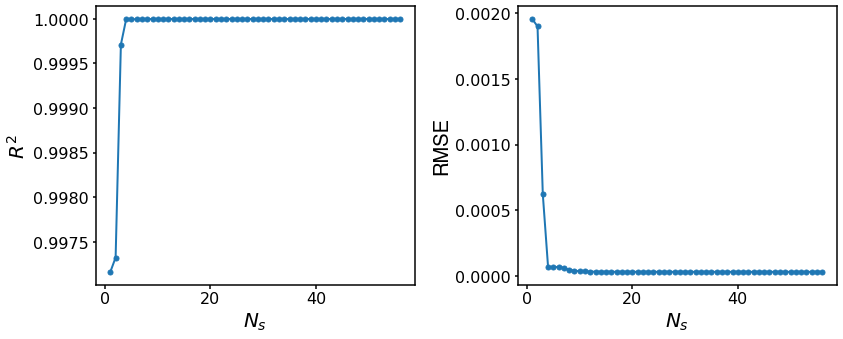

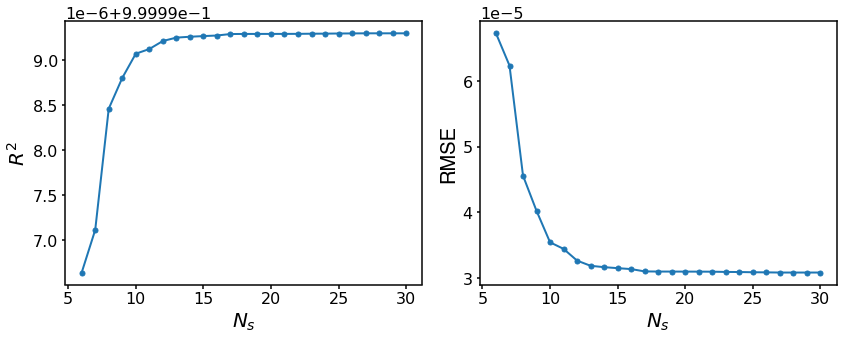

In [5]:
# plot selection results (r2 and rmse as a function of Ns)

fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax = axs[0]
ax.plot(np.arange(len(r2)) + 1, r2,'-o', linewidth=2, markersize=5)
ax.set_xlabel(r'$N_s$', **hfont)
ax.set_ylabel(r'$R^2$', **hfont)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
ax.tick_params(which='major', width=1.5)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax = axs[1]
ax.plot(np.arange(len(rmse)) + 1, rmse,'-o', linewidth=2, markersize=5)
ax.set_xlabel(r'$N_s$', **hfont)
ax.set_ylabel(r'RMSE', **hfont)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
ax.tick_params(which='major', width=1.5)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
fig.tight_layout()
plt.show()


# same plot but only in the interesting region

r2_temp = r2[5:30]
rmse_temp = rmse[5:30]
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax = axs[0]
ax.plot(np.arange(5,30)+1, r2_temp,'-o', linewidth=2, markersize=5)
ax.set_xlabel(r'$N_s$', **hfont)
ax.set_ylabel(r'$R^2$', **hfont)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
ax.tick_params(which='major', width=1.5)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax = axs[1]
ax.plot(np.arange(5,30)+1, rmse_temp,'-o', linewidth=2, markersize=5)
ax.set_xlabel(r'$N_s$', **hfont)
ax.set_ylabel(r'RMSE', **hfont)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
ax.tick_params(which='major', width=1.5)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
fig.tight_layout()
plt.show()

# Result with the chosen number of SFs

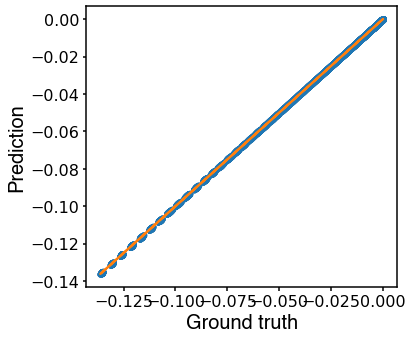

In [6]:
Ns = 18 # chosen number of SFs
X = np.zeros((pool.shape[0],Ns))
for k in range(Ns):
    X[:,k] = pool[:,selected_idx[k]]
reg = LinearRegression(fit_intercept=False).fit(X, E)
Y = reg.predict(X)

# plot target VS predictions
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(E, Y,'o', markersize=5)
ax.plot(Y, Y,'-', lw=2)
np.linspace(2.0, 3.0, num=5)
ax.set_xlabel(r'Ground truth', **hfont)
ax.set_ylabel(r'Prediction', **hfont)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
ax.tick_params(which='major', width=1.5)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
fig.tight_layout()
# ax.set_xlim(-160,-80)
# ax.set_ylim(-160,-80)
plt.show()

In [7]:
# print parameters of the fit and of the selected SFs
for k in range(Ns):
    print("rc = %.1f   eta = %5.3f   l = %3.0f   eps = %1.0f   linear coef = %20.6f" % (rc_list[selected_idx[k]], eta_list[selected_idx[k]], l_list[selected_idx[k]], eps_list[selected_idx[k]], reg.coef_[k]))

rc = 1.4   eta = 0.100   l =  -1   eps = 8   linear coef =    1189460967.469850
rc = 1.4   eta = 8.000   l =  -1   eps = 8   linear coef =    1340223930.636296
rc = 1.4   eta = 0.010   l =  -1   eps = 4   linear coef =  -62700262687.237335
rc = 1.4   eta = 0.100   l =  -1   eps = 4   linear coef =    9169416320.848675
rc = 1.4   eta = 4.000   l =  -1   eps = 8   linear coef = -22341181704438.578125
rc = 1.4   eta = 8.000   l =  -1   eps = 4   linear coef =  252445951577.906433
rc = 1.4   eta = 0.001   l =  -1   eps = 4   linear coef =   54391687449.825546
rc = 1.4   eta = 1.000   l =  -1   eps = 4   linear coef =   -4764193732.405808
rc = 1.4   eta = 1.000   l =   1   eps = 8   linear coef =      16588386.006426
rc = 1.4   eta = 4.000   l =   1   eps = 8   linear coef = -100750739633.678970
rc = 1.4   eta = 2.000   l =  -1   eps = 4   linear coef =   26313396565.864025
rc = 1.4   eta = 0.001   l =  -1   eps = 8   linear coef =    -819878381.401570
rc = 1.4   eta = 0.100   l =   1   eps

In [8]:
# save fitting parameters
folder = './fit_q%.2f' % (q)
if not os.path.exists(folder):
    os.mkdir(folder)
params = np.array([[reg.coef_[k], rc_list[selected_idx[k]], eta_list[selected_idx[k]], l_list[selected_idx[k]], eps_list[selected_idx[k]]] for k in range(Ns)])
save_path = folder + '/params.npy'
np.save(save_path, params)
# print(params)

In [9]:
# save fitting parameters for C code
folder = './fit_q%.2f' % (q)
if not os.path.exists(folder):
    os.mkdir(folder)
file_name = 'fit_q%.2f/fit_params.dat' % (q)
file_out = open(file_name, 'w')
file_out.write(str(Ns)+'\n')
for k in range(Ns):
    file_out.write("%5.3f %3.0f %1.0f %20.6f\n" % (eta_list[selected_idx[k]], l_list[selected_idx[k]], eps_list[selected_idx[k]], reg.coef_[k]))
file_out.close()